In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings

In [3]:
zoo = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\EXCELR\Assignments\KNN\Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [5]:
zoo.shape

(101, 18)

In [8]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
zoo.describe(include = 'all')

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
unique,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,frog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,NaN,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000


In [11]:
type(zoo)

pandas.core.frame.DataFrame

In [12]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [13]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [15]:
zoo['animal name'].value_counts

<bound method IndexOpsMixin.value_counts of 0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object>

In [19]:
zoo['animal name'] = zoo['animal name'].astype('string')

In [20]:
zoo.dtypes

animal name    string
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs           string
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [28]:
corr = zoo.corr
corr

<bound method DataFrame.corr of     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins legs  

In [32]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'animal name'. 
zoo['animal name']= label_encoder.fit_transform(zoo['animal name']) 

zoo['animal name'].unique() 


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [33]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


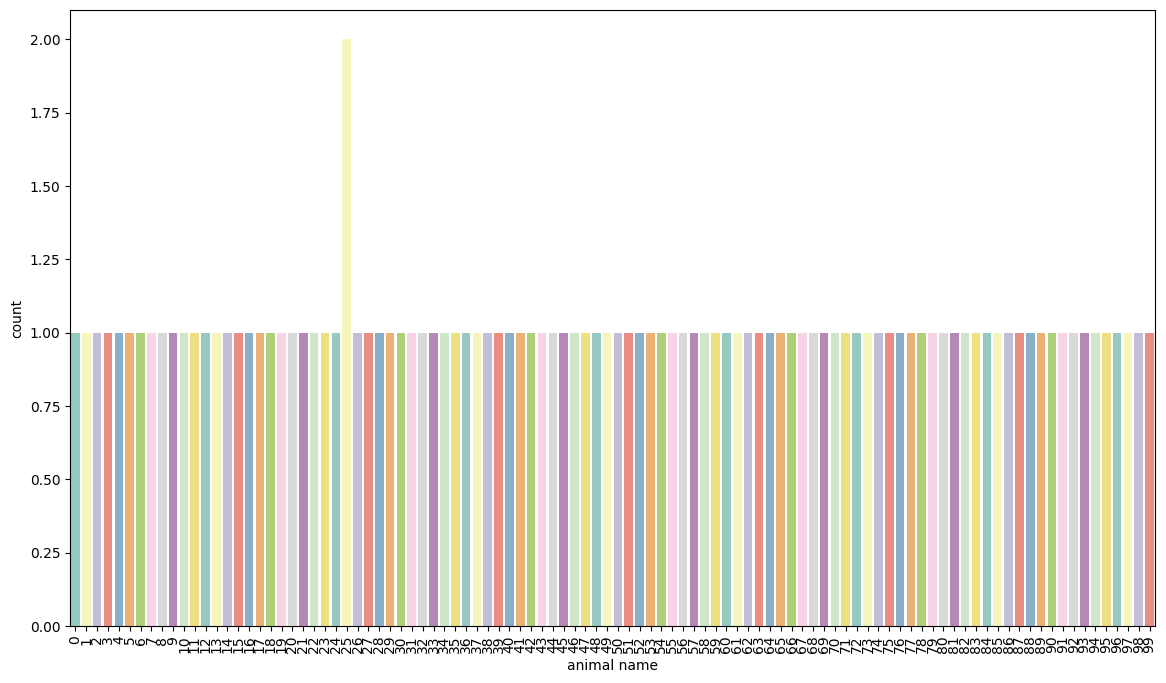

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


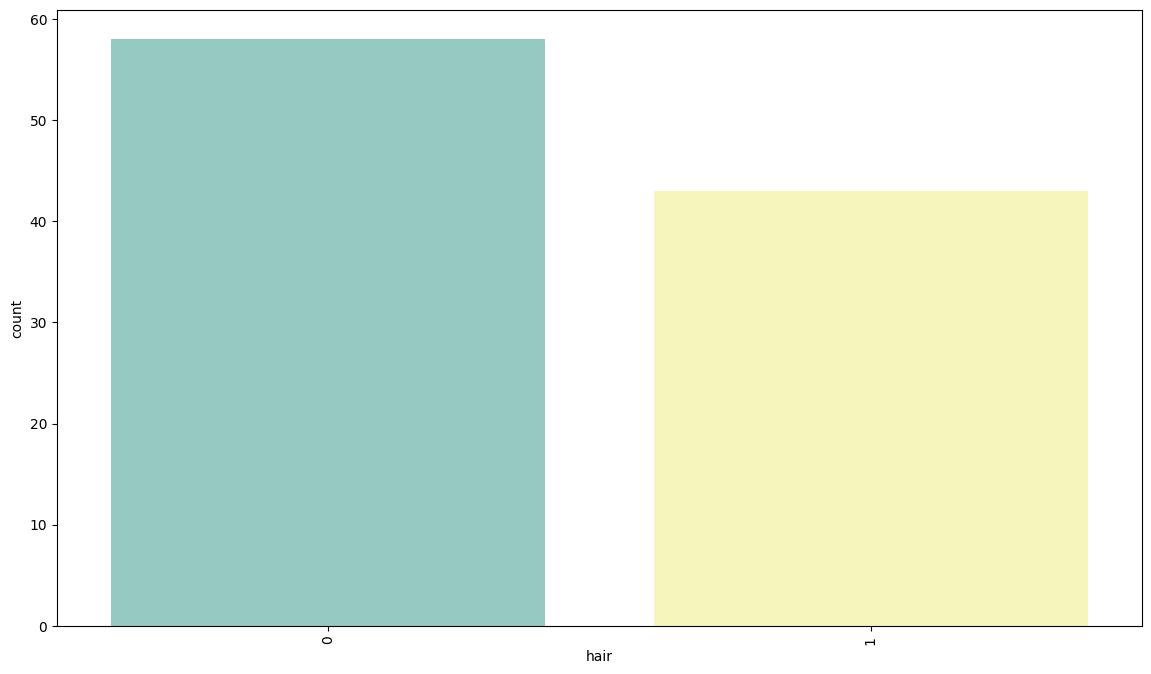

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


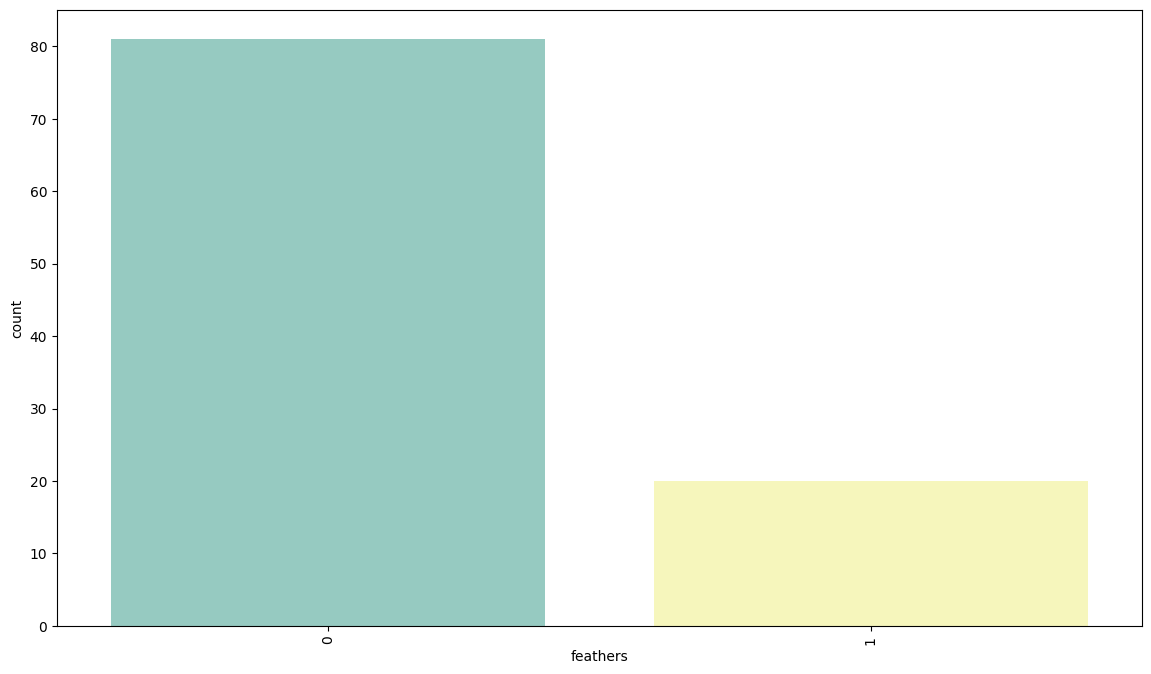

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


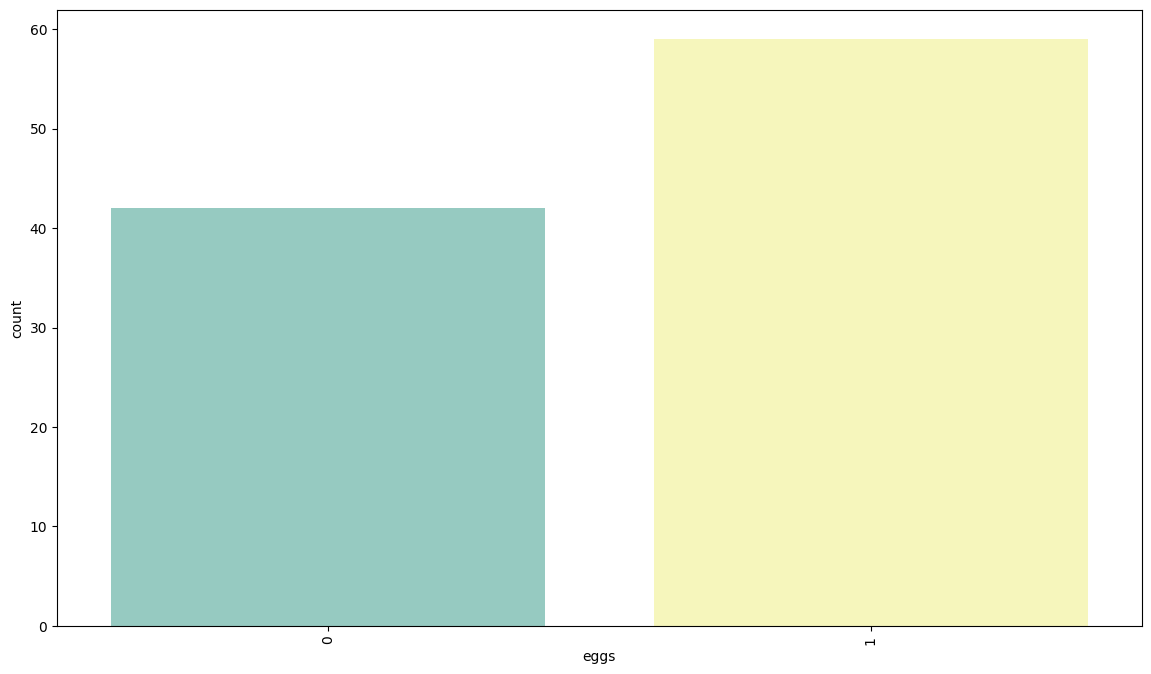

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


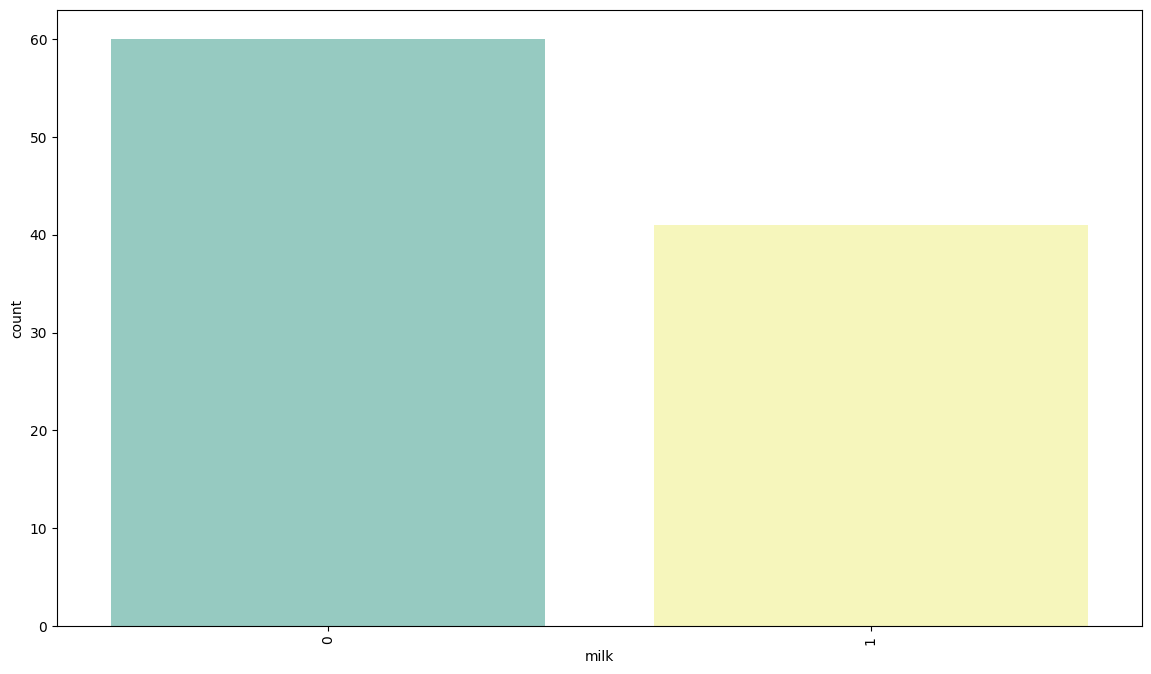

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


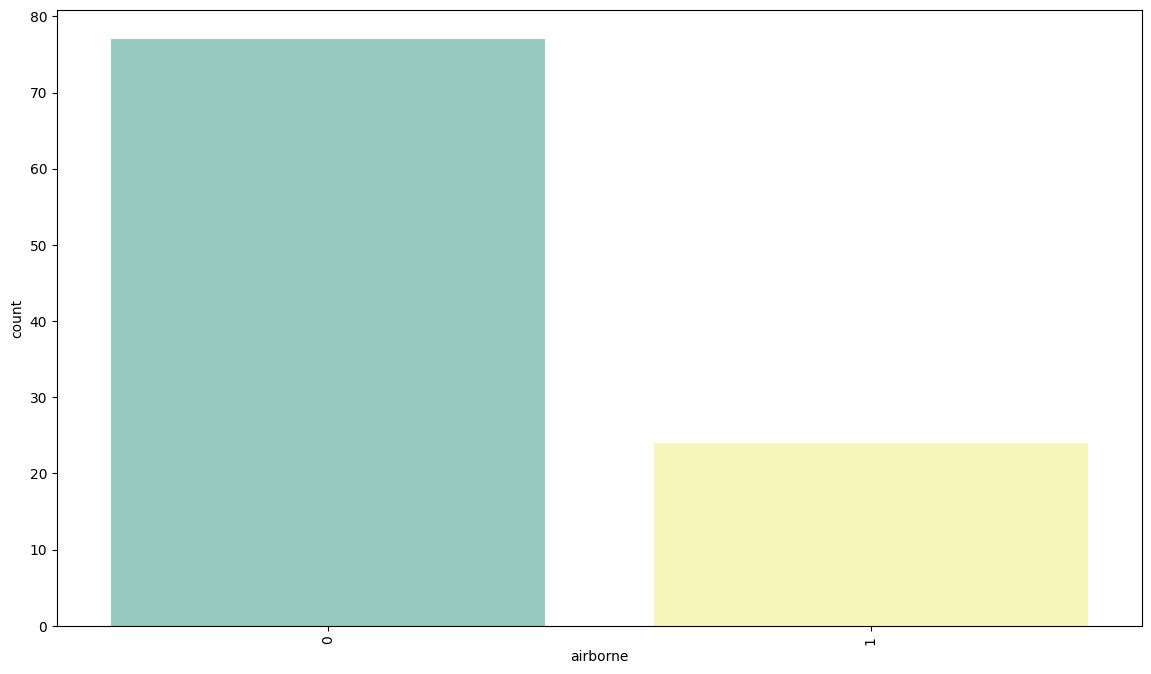

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


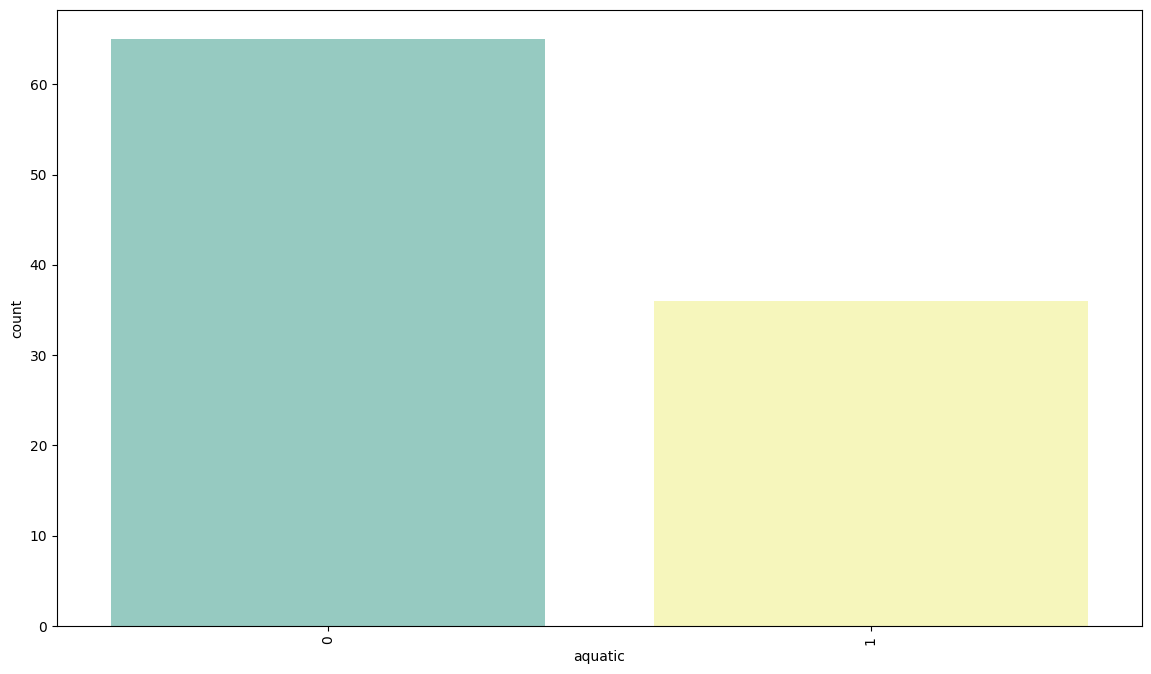

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


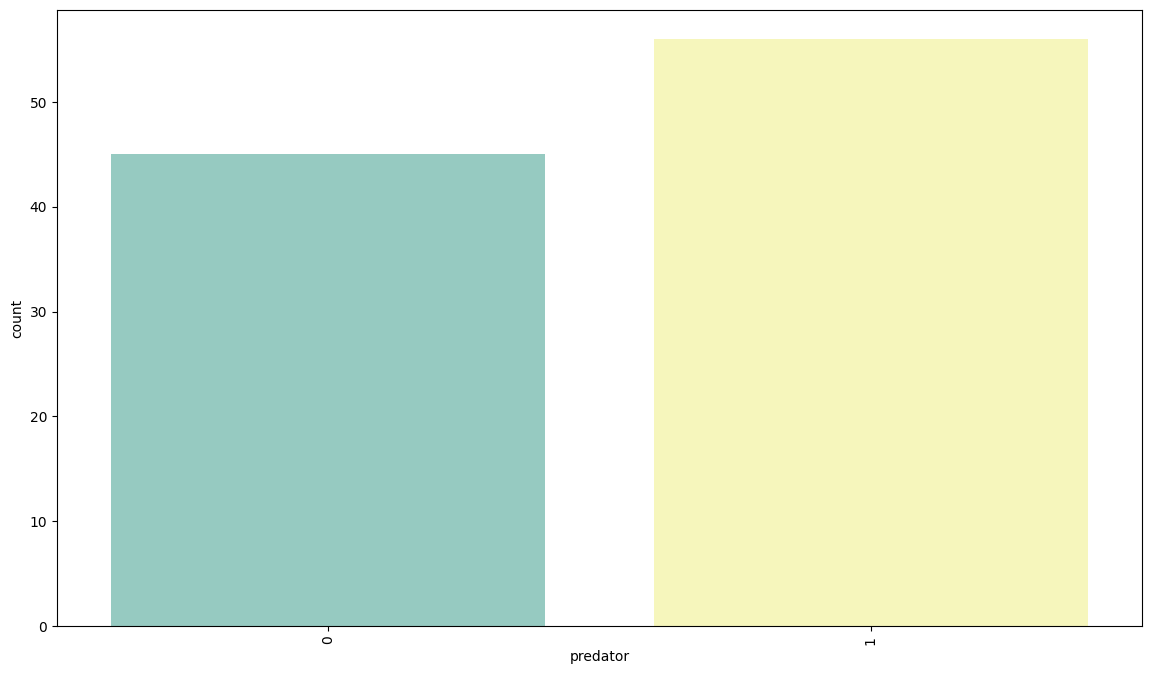

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


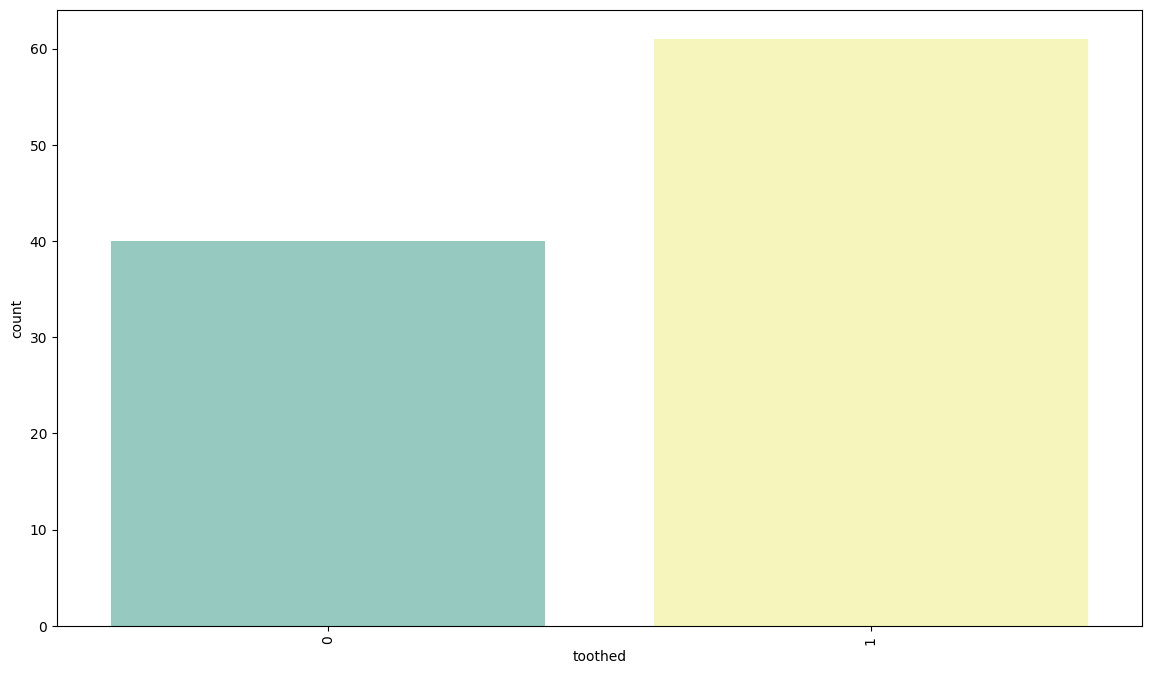

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


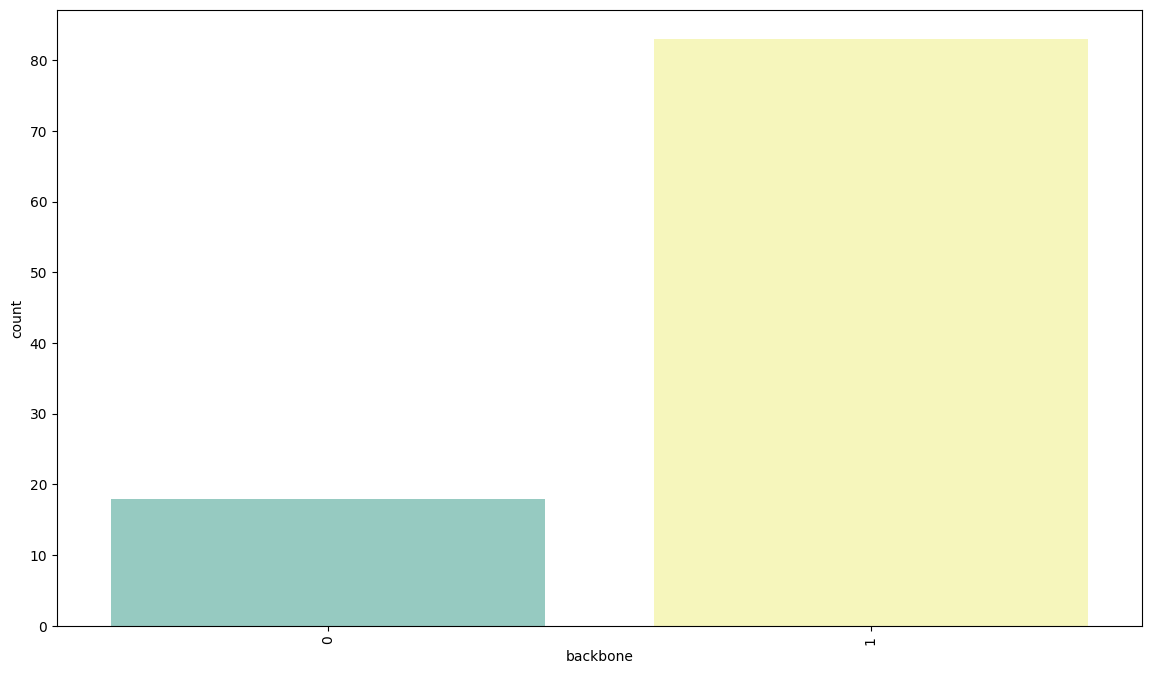

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


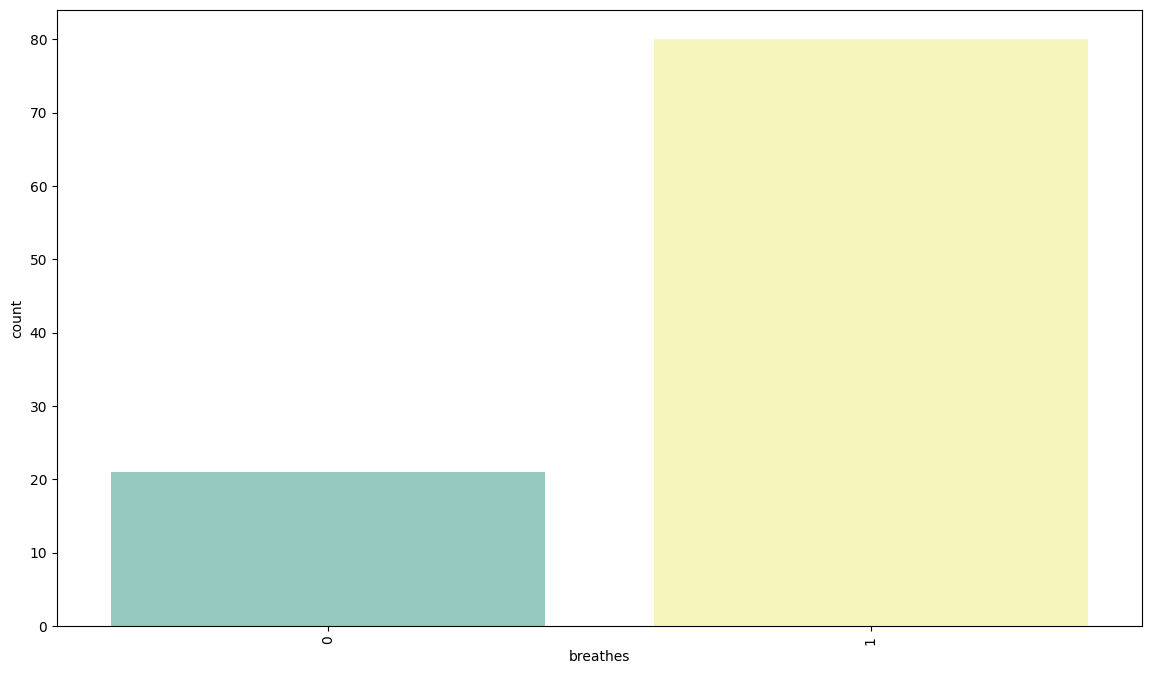

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


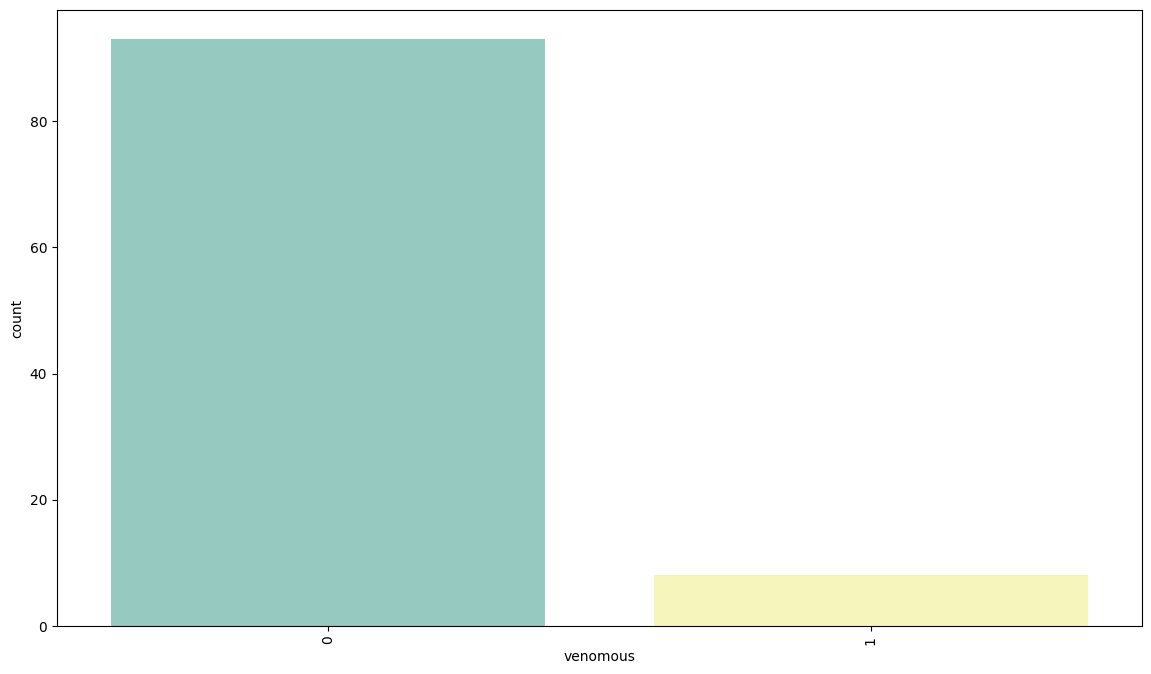

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


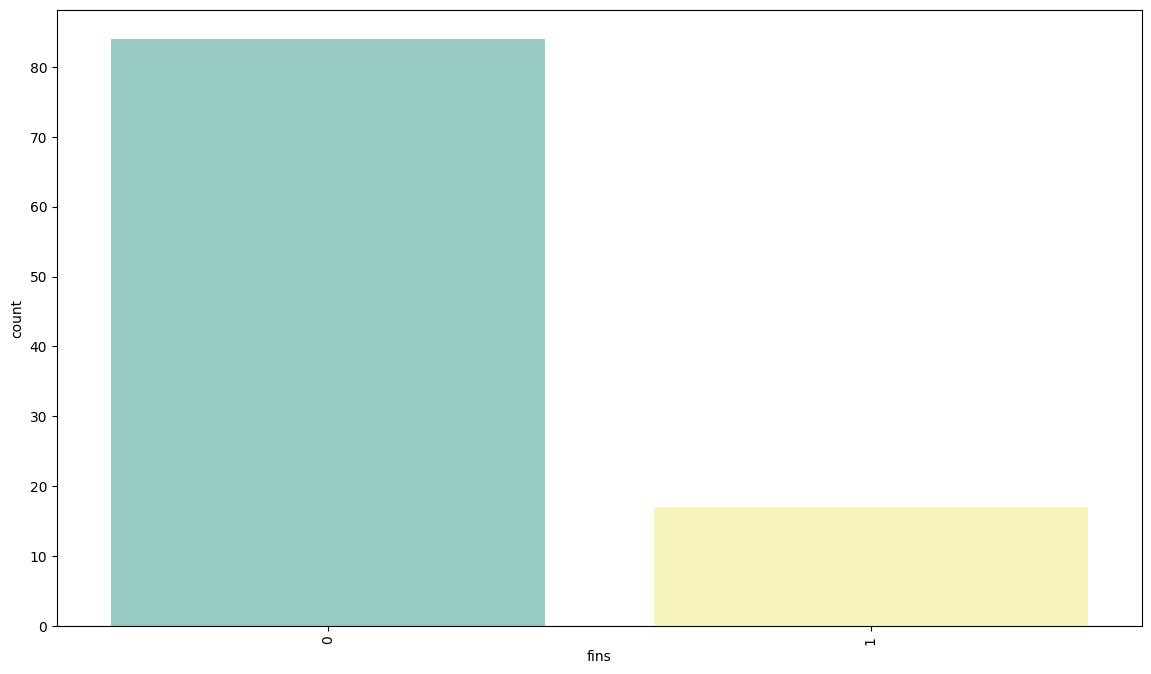

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


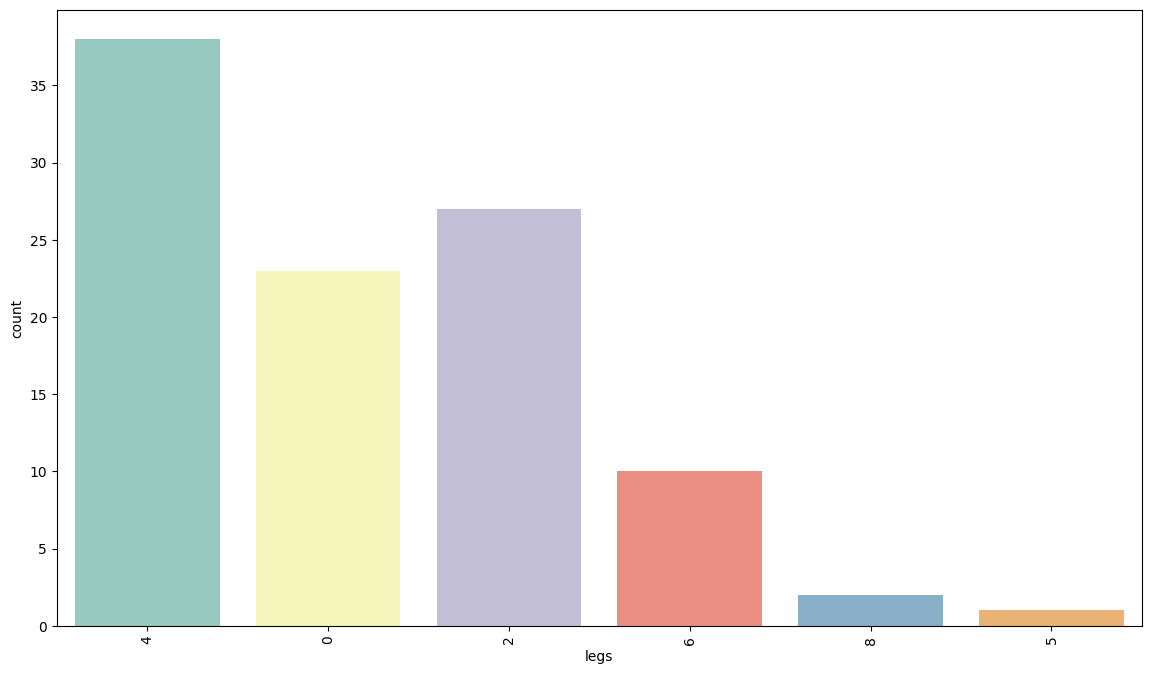

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


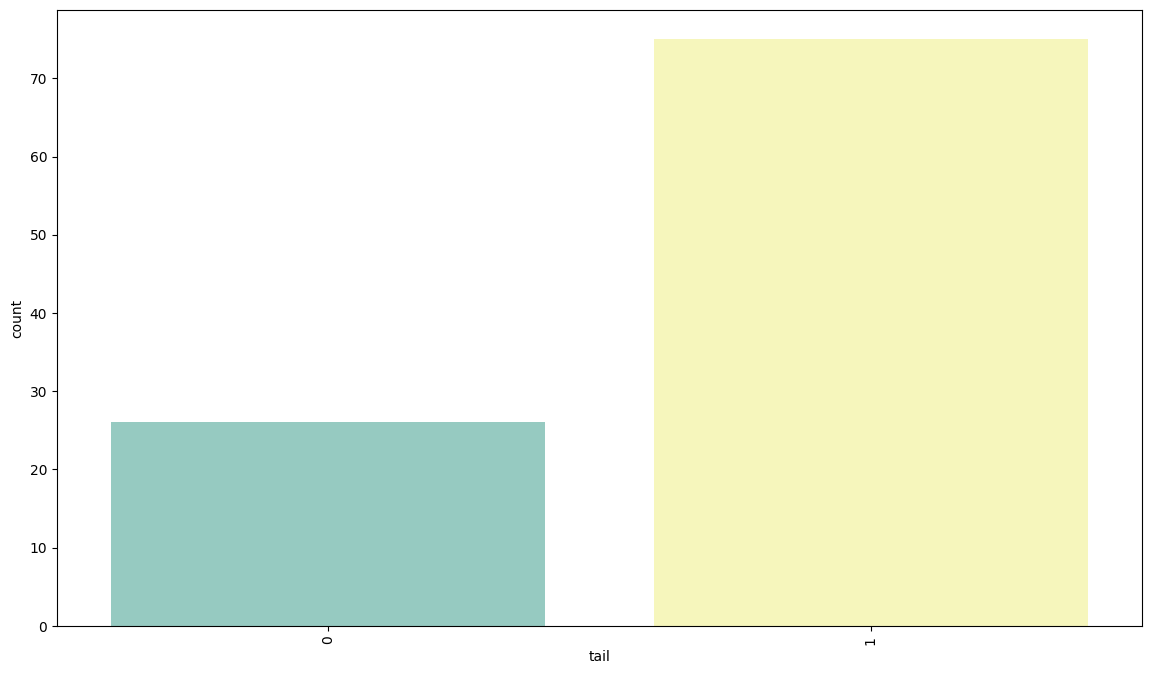

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


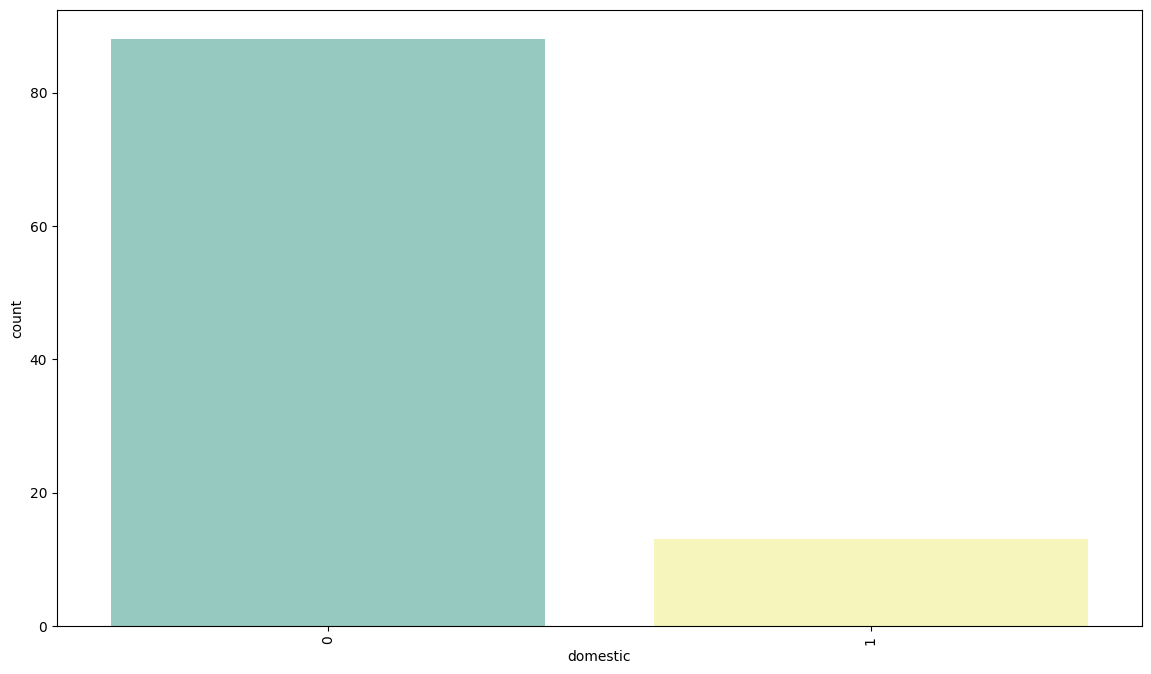

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


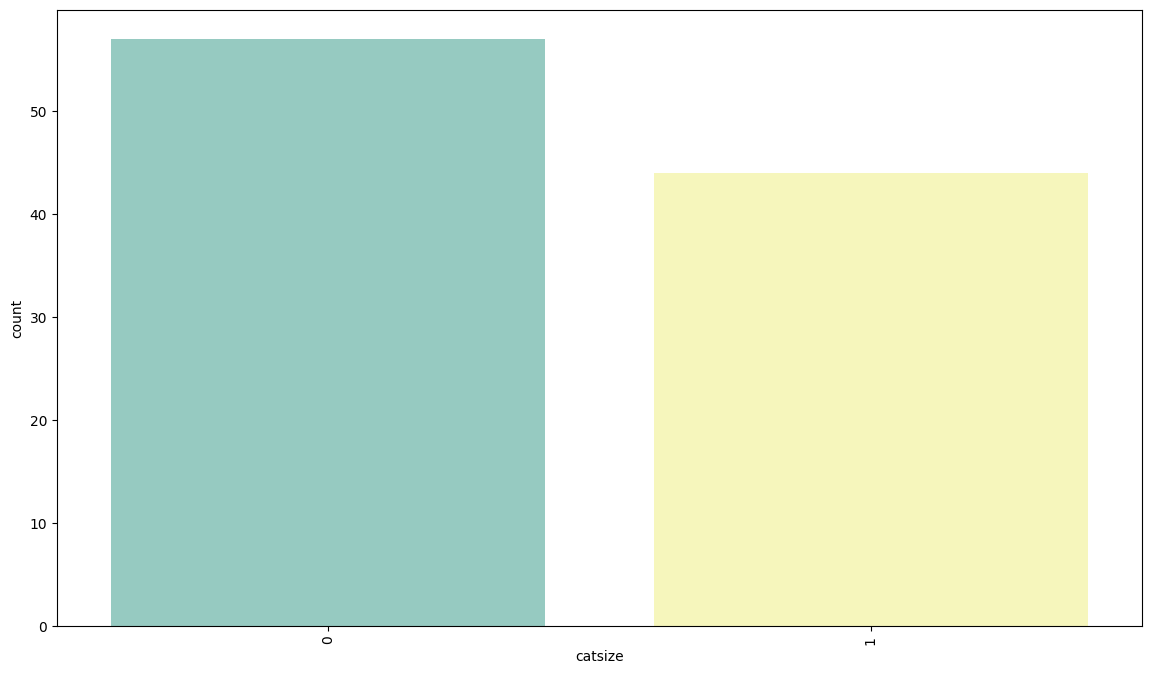

C:\Users\Admin\AppData\Local\Temp\ipykernel_128\4195888648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= column, data = zoo, palette = 'Set3')


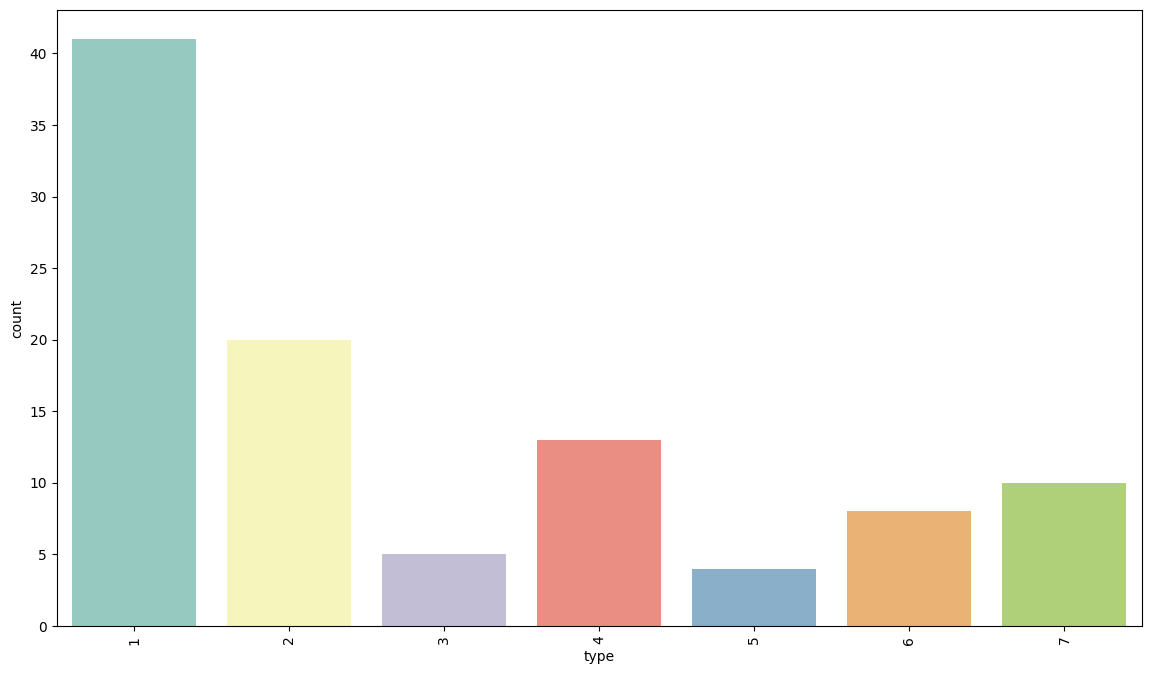

In [37]:
for column in zoo.columns:
    plt.figure(figsize=(14,8))
    sns.countplot(x= column, data = zoo, palette = 'Set3')
    plt.xticks(rotation = 90)
    plt.show()

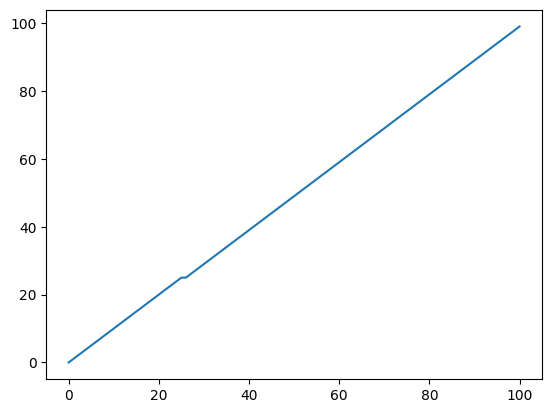

In [43]:
plt.plot(zoo['animal name'])
plt.show()

<Axes: >

<Figure size 1000x3600 with 0 Axes>

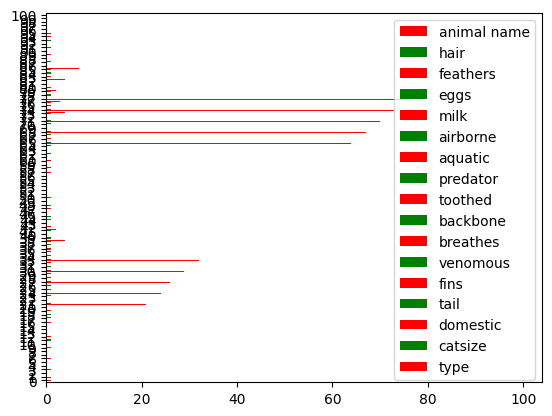

In [46]:
plt.figure(figsize=(10,36))
zoo.plot(kind = 'barh',color = ['r','g'])

<Axes: >

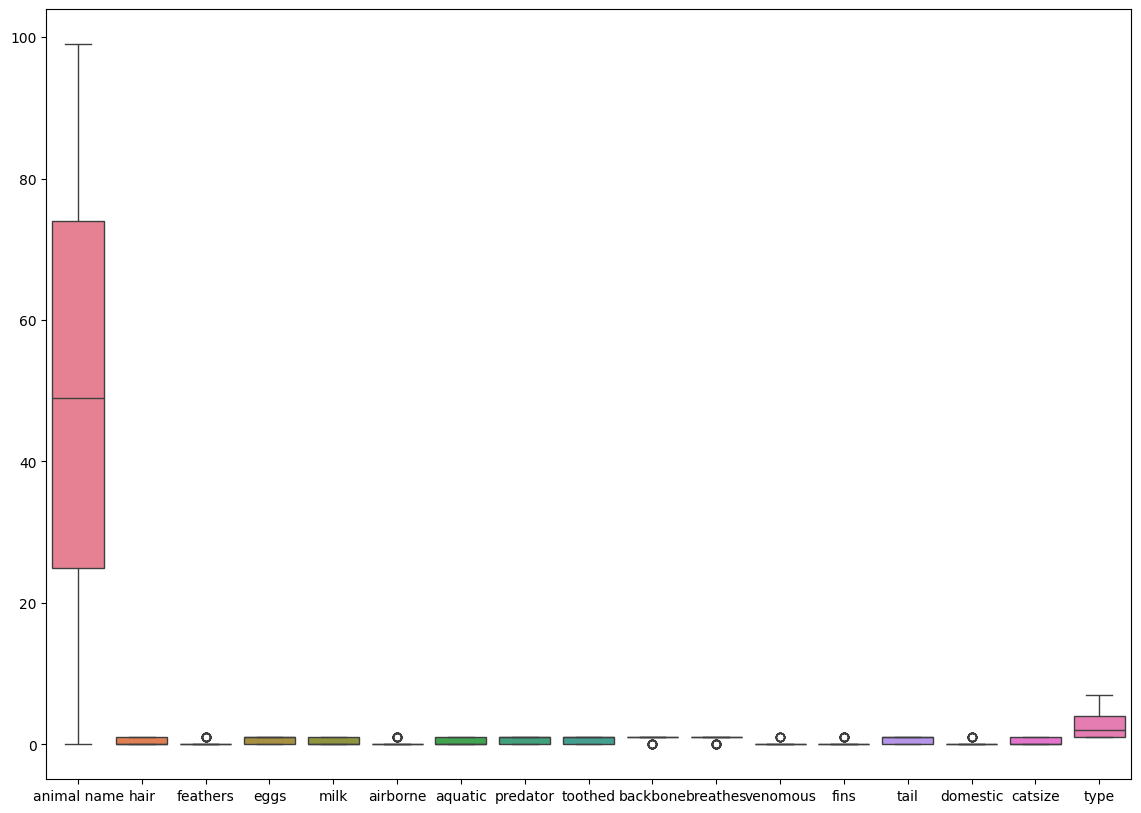

In [49]:
plt.figure(figsize=(14,10))
sns.boxplot(data=zoo)

In [52]:
stscaler = StandardScaler().fit(zoo)
X = stscaler.transform(zoo)

In [53]:
X

array([[-1.70884021,  1.16139451, -0.49690399, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-1.67414817,  1.16139451, -0.49690399, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-1.63945614, -0.86103386, -0.49690399, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.65628693,  1.16139451, -0.49690399, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.69097896, -0.86103386, -0.49690399, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [ 1.725671  , -0.86103386,  2.01246118, ..., -0.38435306,
        -0.87859537, -0.39750205]])

In [63]:
X = zoo.iloc[:,:-10]
y = zoo.iloc[:,-1]

In [64]:
X,y

(     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator
 0              0     1         0     0     1         0        0         1
 1              1     1         0     0     1         0        0         0
 2              2     0         0     1     0         0        1         1
 3              3     1         0     0     1         0        0         1
 4              4     1         0     0     1         0        0         1
 ..           ...   ...       ...   ...   ...       ...      ...       ...
 96            95     1         0     0     1         0        0         0
 97            96     1         0     1     0         1        0         0
 98            97     1         0     0     1         0        0         1
 99            98     0         0     1     0         0        0         0
 100           99     0         1     1     0         1        0         0
 
 [101 rows x 8 columns],
 0      1
 1      1
 2      4
 3      1
 4      1
       ..
 96     1
 97

In [67]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=45)

In [68]:
X_train

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator
98,97,1,0,0,1,0,0,1
91,90,0,0,1,0,0,0,1
29,28,1,0,0,1,0,0,1
77,76,0,0,1,0,0,1,1
5,5,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
95,94,0,1,1,0,1,0,1
32,31,1,0,0,1,0,0,0
3,3,1,0,0,1,0,0,1
30,29,0,0,1,0,1,0,0


In [69]:
X_test

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator
0,0,1,0,0,1,0,0,1
1,1,1,0,0,1,0,0,0
64,63,1,0,0,1,0,0,1
40,39,1,0,1,0,1,0,0
83,82,0,1,1,0,1,0,0
51,50,1,0,1,0,1,0,0
79,78,0,1,1,0,1,1,1
71,70,0,1,1,0,0,0,1
2,2,0,0,1,0,0,1,1
43,42,0,1,1,0,1,0,0


In [70]:
y_train

98    1
91    3
29    1
77    7
5     1
     ..
95    2
32    1
3     1
30    6
75    1
Name: type, Length: 70, dtype: int64

In [71]:
y_test

0     1
1     1
64    1
40    6
83    2
51    6
79    2
71    2
2     4
43    2
62    3
26    5
44    1
50    1
93    1
4     1
58    2
7     4
10    1
63    1
33    2
9     1
20    2
76    3
18    4
74    1
19    1
25    5
21    2
37    2
23    2
Name: type, dtype: int64

In [72]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [74]:
y_pred = model.predict(X_test)  
pd.Series(y_pred).value_counts()

1    25
4     3
2     2
6     1
dtype: int64

In [75]:
y_pred

array([1, 1, 1, 6, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [78]:
zoo = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred, 'Difference': y_test-y_pred})
zoo

,Actual value,Predicted value,Difference
0,1,1,0
1,1,1,0
64,1,1,0
40,6,6,0
83,2,1,1
51,6,1,5
79,2,2,0
71,2,1,1
2,4,1,3
43,2,1,1


In [79]:
print(classification_report(y_test,y_pred))

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

           1       0.40      0.83      0.54        12
           2       1.00      0.20      0.33        10
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       1.00      0.50      0.67         2

    accuracy                           0.42        31
   macro avg       0.40      0.26      0.26        31
weighted avg       0.54      0.42      0.36        31



In [80]:
model.score(X_train,y_train)

0.6285714285714286

In [83]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [85]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [86]:
print(grid.best_score_)
print(grid.best_params_)

0.34571428571428575
{'n_neighbors': 13}


Question

1. What are the key hyperparameters in KNN?
        K Neighbors
                The max depth for a decision tree model hyperparameter. It is specified when you create model. It test different distance metrices for choosing the composition of the neighborhood.
       Distance Metric is nearest point or group for query point. Euclidean Distance nothing but cartesian distance between two points which are plane or hyperplane

2. What distance metrics can be used in KNN?
      Minkowski Distance   intended for real valued vector spaces. It calculated only only in normal vector space.
      Manhattan Distance   is also called taxicab or city block distance, because the way the distance is calculated.
      Euclidean distance   the most widely used one as default metric that sklearn library of python uses for k nearest neighbour. Meassure true straight line distance between two point in euclidean space.